In [9]:
import torch
from torch import optim
from torch.distributions import transforms
from torch.distributions.transforms import ReshapeTransform; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import torchvision.datasets as datasets
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
from torch.utils.data import DataLoader
from torchvision.datasets.mnist import MNIST; torch.manual_seed(0)


In [2]:
sys.path.append("D:\Deep-Learning-2021\Deep-Learning-2021")
from  src.models.variational_encoder  import VariationalAutoEncoderConv
from src.data.load_mnist import MNIST

In [83]:
vae = VariationalAutoEncoderConv(16)
path = "D:\Deep-Learning-2021\Deep-Learning-2021\models\model25.pth"
vae.load_state_dict(torch.load(path))
vae.eval()

VariationalAutoEncoderConv(
  (encoder): encoderConv(
    (encoder): Sequential(
      (0): Conv2d(1, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): Dropout(p=0.5, inplace=False)
      (3): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (4): LeakyReLU(negative_slope=0.01)
      (5): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (6): LeakyReLU(negative_slope=0.01)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
      (8): LeakyReLU(negative_slope=0.01)
      (9): Flatten(start_dim=1, end_dim=-1)
      (10): Linear(in_features=64, out_features=64, bias=True)
    )
    (linear2): Linear(in_features=64, out_features=16, bias=True)
    (linear3): Linear(in_features=64, out_features=16, bias=True)
  )
  (decoder): decoderConv(
    (linear1): Linear(in_features=16, out_features=64, bias=True)
    (decoder): Sequential(
      (0): UnFlatten()
      (1): ConvTranspose2d(64,

In [47]:
mnist_trainset = MNIST(root= "D:\Deep-Learning-2021\Deep-Learning-2021\src\data", train=True, transform = torchvision.transforms.ToTensor())
img , label = mnist_trainset[0]
label

5

In [48]:
def filter_images(dataset):
    new_dataset = []
    new_label = []
    for image, label in dataset:
        if label < 5:
            new_dataset.append(image)
            new_label.append(label)
    return new_dataset, new_label

In [4]:
mnist_refined, labels = filter_images(mnist_trainset)

NameError: name 'filter_images' is not defined

In [88]:
train_loader = DataLoader(mnist_trainset, batch_size= 10 ) 

In [89]:
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

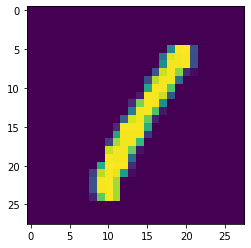

In [95]:
plt.imshow(next(iter(train_loader))[0][3].squeeze(0).detach().numpy())

In [96]:
pred = vae(next(iter(train_loader))[0])

In [97]:
pred

tensor([[[[ 0.0121, -0.0513,  0.0189,  ...,  0.0035, -0.0053, -0.0009],
          [ 0.0244, -0.0053, -0.0237,  ...,  0.0043,  0.0063,  0.0700],
          [-0.0252, -0.0256, -0.0481,  ...,  0.0173, -0.0593, -0.0135],
          ...,
          [-0.0032, -0.0412, -0.0514,  ..., -0.0013, -0.0392,  0.0017],
          [-0.0364, -0.0047, -0.0109,  ...,  0.0138,  0.0103, -0.0204],
          [-0.0170, -0.0021,  0.0330,  ..., -0.0037, -0.0009, -0.0556]]],


        [[[-0.0600, -0.0234, -0.0057,  ..., -0.0036,  0.0018, -0.0089],
          [-0.0084,  0.0053, -0.0090,  ...,  0.0036,  0.0302, -0.0100],
          [ 0.0016, -0.0131, -0.0243,  ...,  0.0239, -0.0319,  0.0015],
          ...,
          [-0.0159, -0.0272,  0.0014,  ..., -0.0150, -0.0111, -0.0102],
          [-0.0221,  0.0049, -0.0376,  ...,  0.0062,  0.0007, -0.0431],
          [-0.0112, -0.0194,  0.0318,  ...,  0.0169, -0.0119, -0.0375]]],


        [[[-0.0332,  0.0069, -0.0209,  ...,  0.0085, -0.0850,  0.0038],
          [ 0.0430, -0.019

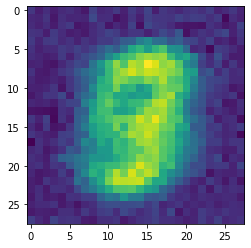

In [101]:
plt.imshow(pred[9].squeeze(0).squeeze(0).detach().numpy())

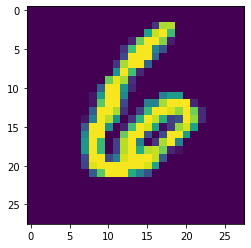

In [44]:
plt.imshow(mnist_trainset.data[mnist_trainset.targets == 6][0].squeeze(0).detach().numpy())

In [45]:
example = mnist_trainset.get_examples()


AttributeError: 'MNIST' object has no attribute 'get_examples'

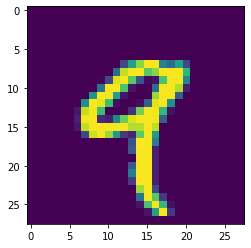

In [62]:
plt.imshow(example[9])